In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import glob, os
%matplotlib inline


<h1>2016</h1>

<h2>Week 1-7</h2>

In [2]:
files = glob.glob('datasets/2016/Anon Week ? Feedback - *.csv')

dfs_2016 = [pd.read_csv(fp).assign(Week=os.path.basename(fp[24]), 
                                   Location=os.path.basename(fp[36:-4])) for fp in files]
df_2016 = pd.concat(dfs_2016, ignore_index = True)
df_2016.columns = ['Schedule Pacing', 
                   'Schedule Pacing2', 
                   'Rating', 
                   'Location', 
                   'Timestamp', 
                   'Unnamed:0', 
                   'Week', 
                   'Track']

pace = df_2016['Schedule Pacing'].fillna(df_2016['Schedule Pacing2'])
year = [ 2016 for i in range(len(df_2016))]
df_2016['Schedule Pacing'] = pace
df_2016['Year'] = year


# convert rating to NPS segments
ratings_16 = df_2016['Rating']
new_ratings_16 = np.array([])

for n in ratings_16:
    if not n == "nan" and not n == "#ERROR!" and not n == "#REF!":
        if float(n) > 4:
            new_ratings_16 = np.append(new_ratings_16, "Promoter")
        elif float(n) > 3:
            new_ratings_16 = np.append(new_ratings_16, "Passive")
        else:
            new_ratings_16 = np.append(new_ratings_16, "Detractor")
    else:
        new_ratings_16 = np.append(new_ratings_16, "NaN")

rating_df_16 = pd.DataFrame(new_ratings_16)
df_2016['Rating'] = rating_df_16

clean_df_2016 = df_2016.drop(['Unnamed:0','Schedule Pacing2'], axis=1)
clean_df_2016



,Schedule Pacing,Rating,Location,Timestamp,Week,Track,Year
0,4,Detractor,LA,6/23/16 15:55,1,NaN,2016
1,4,Passive,LA,6/23/16 16:14,1,NaN,2016
2,4,Passive,LA,6/24/16 0:18,1,NaN,2016
3,4,Passive,LA,6/24/16 6:59,1,NaN,2016
4,5,Passive,LA,6/24/16 9:40,1,NaN,2016
5,4,Promoter,LA,6/23/16 22:07,1,NaN,2016
6,3,Promoter,LA,6/24/16 9:34,1,NaN,2016
7,5,Detractor,NY,6/24/2016 7:03:34,1,Games,2016
8,3,Detractor,NY,6/24/2016 7:10:22,1,Games,2016
9,3,Detractor,NY,6/24/2016 7:03:41,1,Apps,2016


In [3]:
clean_df_2016['Schedule Pacing'] = clean_df_2016['Schedule Pacing'].replace({'2': 2,
                                                                             '3': 3,
                                                                             '4': 4, 
                                                                             '5': 5})
clean_df_2016['Schedule Pacing'].unique()

array([4.0, 5.0, 3.0, 2.0, '#REF!', 1], dtype=object)

In [4]:
def get_nps_2016():
    nps_scores = []
    for i in range(1,8):
        df_week = clean_df_2016[clean_df_2016["Week"] == '%i' % i]
        promos = df_week[df_week["Rating"] == "Promoter"].size
        detracts = df_week[df_week["Rating"] == "Detractor"].size
        passives = df_week[df_week["Rating"] == "Passive"].size
        nps = (promos - detracts) / (promos + detracts + passives) * 100
        nps_scores = np.append(nps_scores, nps)
    return nps_scores

<h2>Week 8</h2>

In [7]:
df_16_w8 = pd.read_csv('datasets/2016/Week 8 Feedback (2016, incomplete) - results.csv')
df_16_w8_renamed = df_16_w8.rename(columns={'How likely is it that you would recommend the Make School Summer Academy to a friend?': 'Rating',
                                            'location': 'Location',
                                            'track': 'Track'})
year = [ 2016 for i in range(len(df_16_w8_renamed))]
week = [ 8 for i in range(len(df_16_w8_renamed))]
df_16_w8_renamed['Year'] = year
df_16_w8_renamed['Week'] = week

df_16_w8_renamed['Track'] = df_16_w8_renamed['Track'].map({'summerApps': 'Apps',
                                                  'summerIntro': 'Intro',
                                                  'summerGames': 'Games',
                                                  'summerVR': 'VR',
                                                  'summerApps (4-week)': 'Apps (4-Week)'})
''
rating_w8_df = pd.DataFrame(convert_ratings(df_16_w8_renamed, 'Rating'))
df_16_w8_renamed['Rating'] = rating_w8_df
clean_16_w8 = df_16_w8_renamed.drop(['#','Network ID'], axis=1)

clean_16_w8

,Rating,Location,Track,Start Date (UTC),Submit Date (UTC),Year,Week
0,Promoter,New York,Apps,9/7/16 1:03,9/7/16 1:04,2016,8
1,Promoter,San Francisco,Intro,9/7/16 1:03,9/7/16 1:04,2016,8
2,Promoter,New York,Intro,9/7/16 1:03,9/7/16 1:05,2016,8
3,Promoter,Sunnyvale,Apps (4-Week),9/7/16 1:04,9/7/16 1:06,2016,8
4,Detractor,San Francisco,Intro,9/7/16 1:04,9/7/16 1:11,2016,8
5,Promoter,San Francisco,Apps,9/7/16 1:09,9/7/16 1:13,2016,8
6,Passive,San Francisco,Apps,9/7/16 1:04,9/7/16 1:14,2016,8
7,Detractor,New York,Games,9/7/16 1:14,9/7/16 1:15,2016,8
8,Detractor,Singapore,Apps,9/7/16 1:16,9/7/16 1:21,2016,8
9,Promoter,New York,Games,9/7/16 1:22,9/7/16 1:27,2016,8


In [8]:
def get_nps_2016_w8():
    nps_scores = 0
    promos = clean_16_w8[clean_16_w8["Rating"] == "Promoter"].size
    detracts = clean_16_w8[clean_16_w8["Rating"] == "Detractor"].size
    passives = clean_16_w8[clean_16_w8["Rating"] == "Passive"].size
    nps = (promos - detracts) / (promos + detracts + passives) * 100
    nps_scores = nps
    return nps_scores
nps_16_w8 = get_nps_2016_w8()
nps_16_w8

55.384615384615387

<h2>Complete 2016 Data (Week 1-8)</h2>

In [9]:
frames = [clean_df_2016, clean_16_w8]
complete_2016_df = pd.concat(frames)
complete_2016_df['Location'] = complete_2016_df['Location'].replace({'Los Angeles': ' LA',
                                                                     'New York': ' NY',
                                                                    'Singapore': ' SG',
                                                                    'Sunnyvale': ' SV',
                                                                    'San Francisco': ' SF',
                                                                    ' Singapore': ' SG'})

In [17]:
complete_2016_df

,Location,Rating,Schedule Pacing,Start Date (UTC),Submit Date (UTC),Timestamp,Track,Week,Year
0,LA,Detractor,4,NaN,NaN,6/23/16 15:55,NaN,1,2016
1,LA,Passive,4,NaN,NaN,6/23/16 16:14,NaN,1,2016
2,LA,Passive,4,NaN,NaN,6/24/16 0:18,NaN,1,2016
3,LA,Passive,4,NaN,NaN,6/24/16 6:59,NaN,1,2016
4,LA,Passive,5,NaN,NaN,6/24/16 9:40,NaN,1,2016
5,LA,Promoter,4,NaN,NaN,6/23/16 22:07,NaN,1,2016
6,LA,Promoter,3,NaN,NaN,6/24/16 9:34,NaN,1,2016
7,NY,Detractor,5,NaN,NaN,6/24/2016 7:03:34,Games,1,2016
8,NY,Detractor,3,NaN,NaN,6/24/2016 7:10:22,Games,1,2016
9,NY,Detractor,3,NaN,NaN,6/24/2016 7:03:41,Apps,1,2016


(-100, 100)

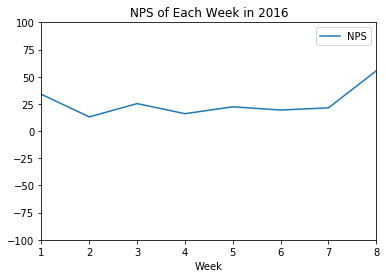

In [11]:
nps_2016 = get_nps_2016()
nps_2016 = np.append(nps_2016, get_nps_2016_w8())
complete_data_2016 = {'Week': [i for i in range(1,9)], 'NPS': nps_2016}
nps_df_2016 = pd.DataFrame(complete_data_2016)
nps_df_2016.plot(x="Week", y="NPS", title="NPS of Each Week in 2016")
plt.xlim(1,8)
plt.ylim(-100,100)



2. Relationship between track and pace
3. Relationship between rating and location
4. Same track but different location -> Variation in Rating


In [12]:
def filter_data_df(_df, attr, value=None):
    if value is None:
        result = _df[attr]
    result = _df[(_df[attr] == value)]
    return result

### 1. Promoters from each track

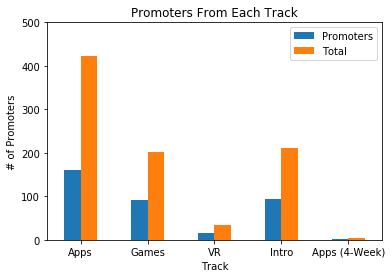

In [13]:
apps = filter_data_df(complete_2016_df, 'Track', 'Apps')
games = filter_data_df(complete_2016_df, 'Track', 'Games')
vr = filter_data_df(complete_2016_df, 'Track', 'VR')
intro = filter_data_df(complete_2016_df, 'Track', 'Intro')
apps_4w = filter_data_df(complete_2016_df, 'Track', 'Apps (4-Week)')

# promoters from each track
apps_pr = len(filter_data_df(apps, 'Rating', 'Promoter'))
games_pr = len(filter_data_df(games, 'Rating', 'Promoter'))
vr_pr = len(filter_data_df(vr, 'Rating', 'Promoter'))
intro_pr = len(filter_data_df(intro, 'Rating', 'Promoter'))
apps_4w_pr = len(filter_data_df(apps_4w, 'Rating', 'Promoter'))

track_prs = {'Track': ['Apps', 'Games', 'VR', 'Intro', 'Apps (4-Week)'], 
             'Promoters':[apps_pr, games_pr, vr_pr, intro_pr, apps_4w_pr], 
             'Total':[len(apps), len(games), len(vr), len(intro), len(apps_4w)]}
track_prs_df = pd.DataFrame(track_prs)
ax = track_prs_df.plot(kind='bar', title ="Promoters From Each Track", rot=0)
ax.set_xticks(track_prs_df.index)
ax.set_xticklabels(track_prs_df.Track)
plt.xlabel('Track')
plt.ylabel("# of Promoters")
plt.ylim(0,500)
plt.show()


### 2. Promoters from each location

In [ ]:
complete_2016_df.Location.unique()

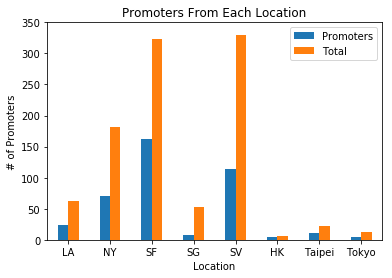

In [14]:
la = filter_data_df(complete_2016_df, 'Location', ' LA')
ny = filter_data_df(complete_2016_df, 'Location', ' NY')
sf = filter_data_df(complete_2016_df, 'Location', ' SF')
sg = filter_data_df(complete_2016_df, 'Location', ' SG')
sv = filter_data_df(complete_2016_df, 'Location', ' SV')
hk = filter_data_df(complete_2016_df, 'Location', ' HK')
tp = filter_data_df(complete_2016_df, 'Location', ' Taipei')
tk = filter_data_df(complete_2016_df, 'Location', ' Tokyo')

la_pr = len(filter_data_df(la, 'Rating', 'Promoter'))
ny_pr = len(filter_data_df(ny, 'Rating', 'Promoter'))
sf_pr = len(filter_data_df(sf, 'Rating', 'Promoter'))
sg_pr = len(filter_data_df(sg, 'Rating', 'Promoter'))
sv_pr = len(filter_data_df(sv, 'Rating', 'Promoter'))
hk_pr = len(filter_data_df(hk, 'Rating', 'Promoter'))
tp_pr = len(filter_data_df(tp, 'Rating', 'Promoter'))
tk_pr = len(filter_data_df(tk, 'Rating', 'Promoter'))

location_prs = {'Location': ['LA', 'NY', 'SF', 'SG', 'SV', 'HK', 'Taipei', 'Tokyo'], 
                'Promoters': [la_pr, ny_pr,sf_pr, sg_pr, sv_pr, hk_pr, tp_pr, tk_pr], 
                'Total':[len(la), len(ny), len(sf), len(sg), len(sv), len(hk), len(tp), len(tk)]}
loc_prs_df = pd.DataFrame(location_prs)
ax2 = loc_prs_df.plot(kind='bar', title ="Promoters From Each Location", rot=0)
ax2.set_xticks(loc_prs_df.index)
ax2.set_xticklabels(loc_prs_df.Location)
plt.xlabel('Location')
plt.ylabel("# of Promoters")
plt.ylim(0,350)
plt.show()

# Why does SG have fewer percentage of promoters? Due to pace?

### 3. Each Week's Average Pace

(1, 5)

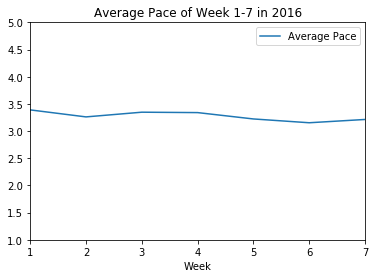

In [79]:
week_ = complete_2016_df['Week']
pace_ = complete_2016_df[complete_2016_df['Schedule Pacing'] != '#REF!']
pace_c = pace_['Schedule Pacing'].mean()
week_df = pd.DataFrame(week_)
pace_df = pd.DataFrame(pace_)

def get_avg_pace():
    avg_paces = []
    for i in range(1,8):
        df_week = complete_2016_df[complete_2016_df["Week"] == '%i' % i]
        df_p = df_week[df_week['Schedule Pacing'] != '#REF!']
        avg = df_p['Schedule Pacing'].mean()
        avg_paces = np.append(avg_paces, avg)
    return avg_paces

avg = get_avg_pace()
avg_data_2016 = {'Week': [i for i in range(1,8)], 'Average Pace': avg}
nps_df_2016 = pd.DataFrame(avg_data_2016)
nps_df_2016.plot(x="Week", y="Average Pace", title="Average Pace of Week 1-7 in 2016")
plt.xlim(1,7)
plt.ylim(1,5)

### 4. 


<h1>2017</h1>

In [6]:
df_2017 = pd.read_csv('datasets/2017/Student Feedback Surveys-Superview.csv')

# convert pacing value
df_2017['Schedule Pacing'] = df_2017['Schedule Pacing'].map({"Just right" : 3, 
                                                             "A little too fast" : 4, 
                                                             "A little too slow" : 2, 
                                                             "Way too slow" : 1, 
                                                             "Way too fast" : 5})
# convert week value
df_2017['Week'] = df_2017['Week'].map({"Week 1" : 1, 
                                       "Week 2" : 2,
                                       "Week 3" : 3,
                                       "Week 4" : 4,
                                       "Week 5" : 5,
                                       "Week 6" : 6,
                                       "Week 7" : 7,
                                       "Week 8" : 8})
year_17 = [ 2017 for i in range(len(df_2017))]
df_2017['Year'] = year_17



# convert rating to NPS segments


def convert_ratings(df, rating_name):
    ratings = df[rating_name]
    new_ratings = np.array([])
    for n in ratings:
        if not n == "nan" and not n == "#ERROR!":
            if float(n) > 8:
                new_ratings = np.append(new_ratings, "Promoter")
            elif float(n) > 6:
                new_ratings = np.append(new_ratings, "Passive")
            else:
                new_ratings = np.append(new_ratings, "Detractor")
        else:
            new_ratings = np.append(new_ratings, "NaN")
    return new_ratings

rating_df = pd.DataFrame(convert_ratings(df_2017, 'Rating (Num)'))
df_2017['Rating (Num)'] = rating_df
clean_df_2017 = df_2017.rename(columns={'Rating (Num)': 'Rating'})

clean_df_2017



,ID,Location,Track,Week,Rating,Schedule Pacing,Year
0,134,San Francisco,"Apps, Explorer",1,Detractor,3.0,2017
1,36,Los Angeles,Apps,1,Detractor,4.0,2017
2,117,San Francisco,Games,1,Detractor,1.0,2017
3,253,NaN,NaN,2,Detractor,4.0,2017
4,350,New York City,"Apps, Explorer",1,Detractor,3.0,2017
5,23,Redwood City,Apps,1,Detractor,3.0,2017
6,28,Los Angeles,Apps,7,Detractor,3.0,2017
7,65,San Francisco,Apps,1,Detractor,2.0,2017
8,101,Santa Clara,Apps,1,Detractor,2.0,2017
9,124,Santa Clara,Apps,1,Detractor,3.0,2017


In [ ]:
def get_nps_2017():
    nps_scores = []
    for i in range(1,9):
        df_week = clean_df_2017[clean_df_2017["Week"] == i]
        promos = df_week[df_week["Rating"] == "Promoter"].size
        detracts = df_week[df_week["Rating"] == "Detractor"].size
        passives = df_week[df_week["Rating"] == "Passive"].size
        nps = (promos - detracts) / (promos + detracts + passives) * 100
        nps_scores = np.append(nps_scores, nps)
    return nps_scores

nps_2017 = get_nps_2017()
data_2017 = {'Week': [i for i in range(1,9)], 'NPS': nps_2017}
nps_df_2017 = pd.DataFrame(data_2017)
nps_df_2017.plot(x="Week", y="NPS", title="NPS of Each Week in 2017")
plt.xlim(1,8)
plt.ylim(-100,100)

<h1>Concatenation of 2016 & 2017 </h1>

In [ ]:
frames_all = [clean_df_2016, clean_16_w8, clean_df_2017]
df_all = pd.concat(frames_all)
df_all